In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Project 1_data.csv')

In [3]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import tree
!pip install graphviz 
import seaborn as sns

In [6]:
# Define the file path
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "Project 1_data.csv"
data = pd.read_csv(file_path)

# Drop the "Id" column if it exists
if 'Id' in data.columns:
    data.drop("Id", axis=1, inplace=True)

# Fill missing values with -1
data.fillna(value=-1, inplace=True)

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Display the shape of the training and test sets
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Training data shape: (1022, 80)
Test data shape: (438, 80)


In [7]:
print(train_data.head(35))

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
135           20       RL         80.0    10400   Pave    -1      Reg   
1452         180       RM         35.0     3675   Pave    -1      Reg   
762           60       FV         72.0     8640   Pave    -1      Reg   
932           20       RL         84.0    11670   Pave    -1      IR1   
435           60       RL         43.0    10667   Pave    -1      IR2   
629           80       RL         82.0     9020   Pave    -1      Reg   
1210          60       RL         70.0    11218   Pave    -1      Reg   
1118          80       RL         85.0    13825   Pave    -1      Reg   
1084          60       RL         -1.0    13031   Pave    -1      IR2   
158           60       FV        100.0    12552   Pave    -1      Reg   
967           20       RL         -1.0     7390   Pave    -1      IR1   
1259          20       RL         65.0     9750   Pave    -1      Reg   
551           20       RM         50.0     6000   P

In [8]:
print(test_data.head(35))

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
892           20       RL         70.0     8414   Pave    -1      Reg   
1105          60       RL         98.0    12256   Pave    -1      IR1   
413           30       RM         56.0     8960   Pave  Grvl      Reg   
522           50       RM         50.0     5000   Pave    -1      Reg   
1036          20       RL         89.0    12898   Pave    -1      IR1   
614          180       RM         21.0     1491   Pave    -1      Reg   
218           50       RL         -1.0    15660   Pave    -1      IR1   
1160         160       RL         24.0     2280   Pave    -1      Reg   
649          180       RM         21.0     1936   Pave    -1      Reg   
887           50       RL         59.0    16466   Pave    -1      IR1   
576           50       RL         52.0     6292   Pave    -1      Reg   
1252          20       RL         62.0     9858   Pave    -1      Reg   
1061          30  C (all)        120.0    18000   G

In [9]:
list(set(train_data.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [10]:
df_num = train_data.select_dtypes(include = ['float64', 'int64'])

In [11]:
df_num_test = test_data.select_dtypes(include = ['float64', 'int64'])

C:\Users\nnodu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nnodu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


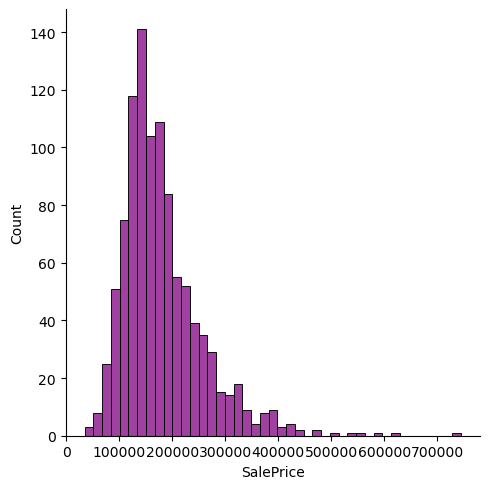

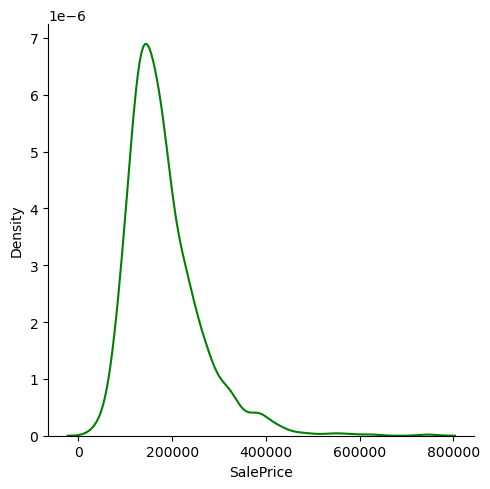

In [12]:
#The x-axis represents the values of the 'SalePrice' feature, which is the variable being plotted.
sns.displot(df_num['SalePrice'], kind="hist", color="purple")
#The y-axis represents the frequency or count of occurrences of each value of the 'SalePrice' feature.
sns.displot(df_num['SalePrice'], kind="kde", color="green")

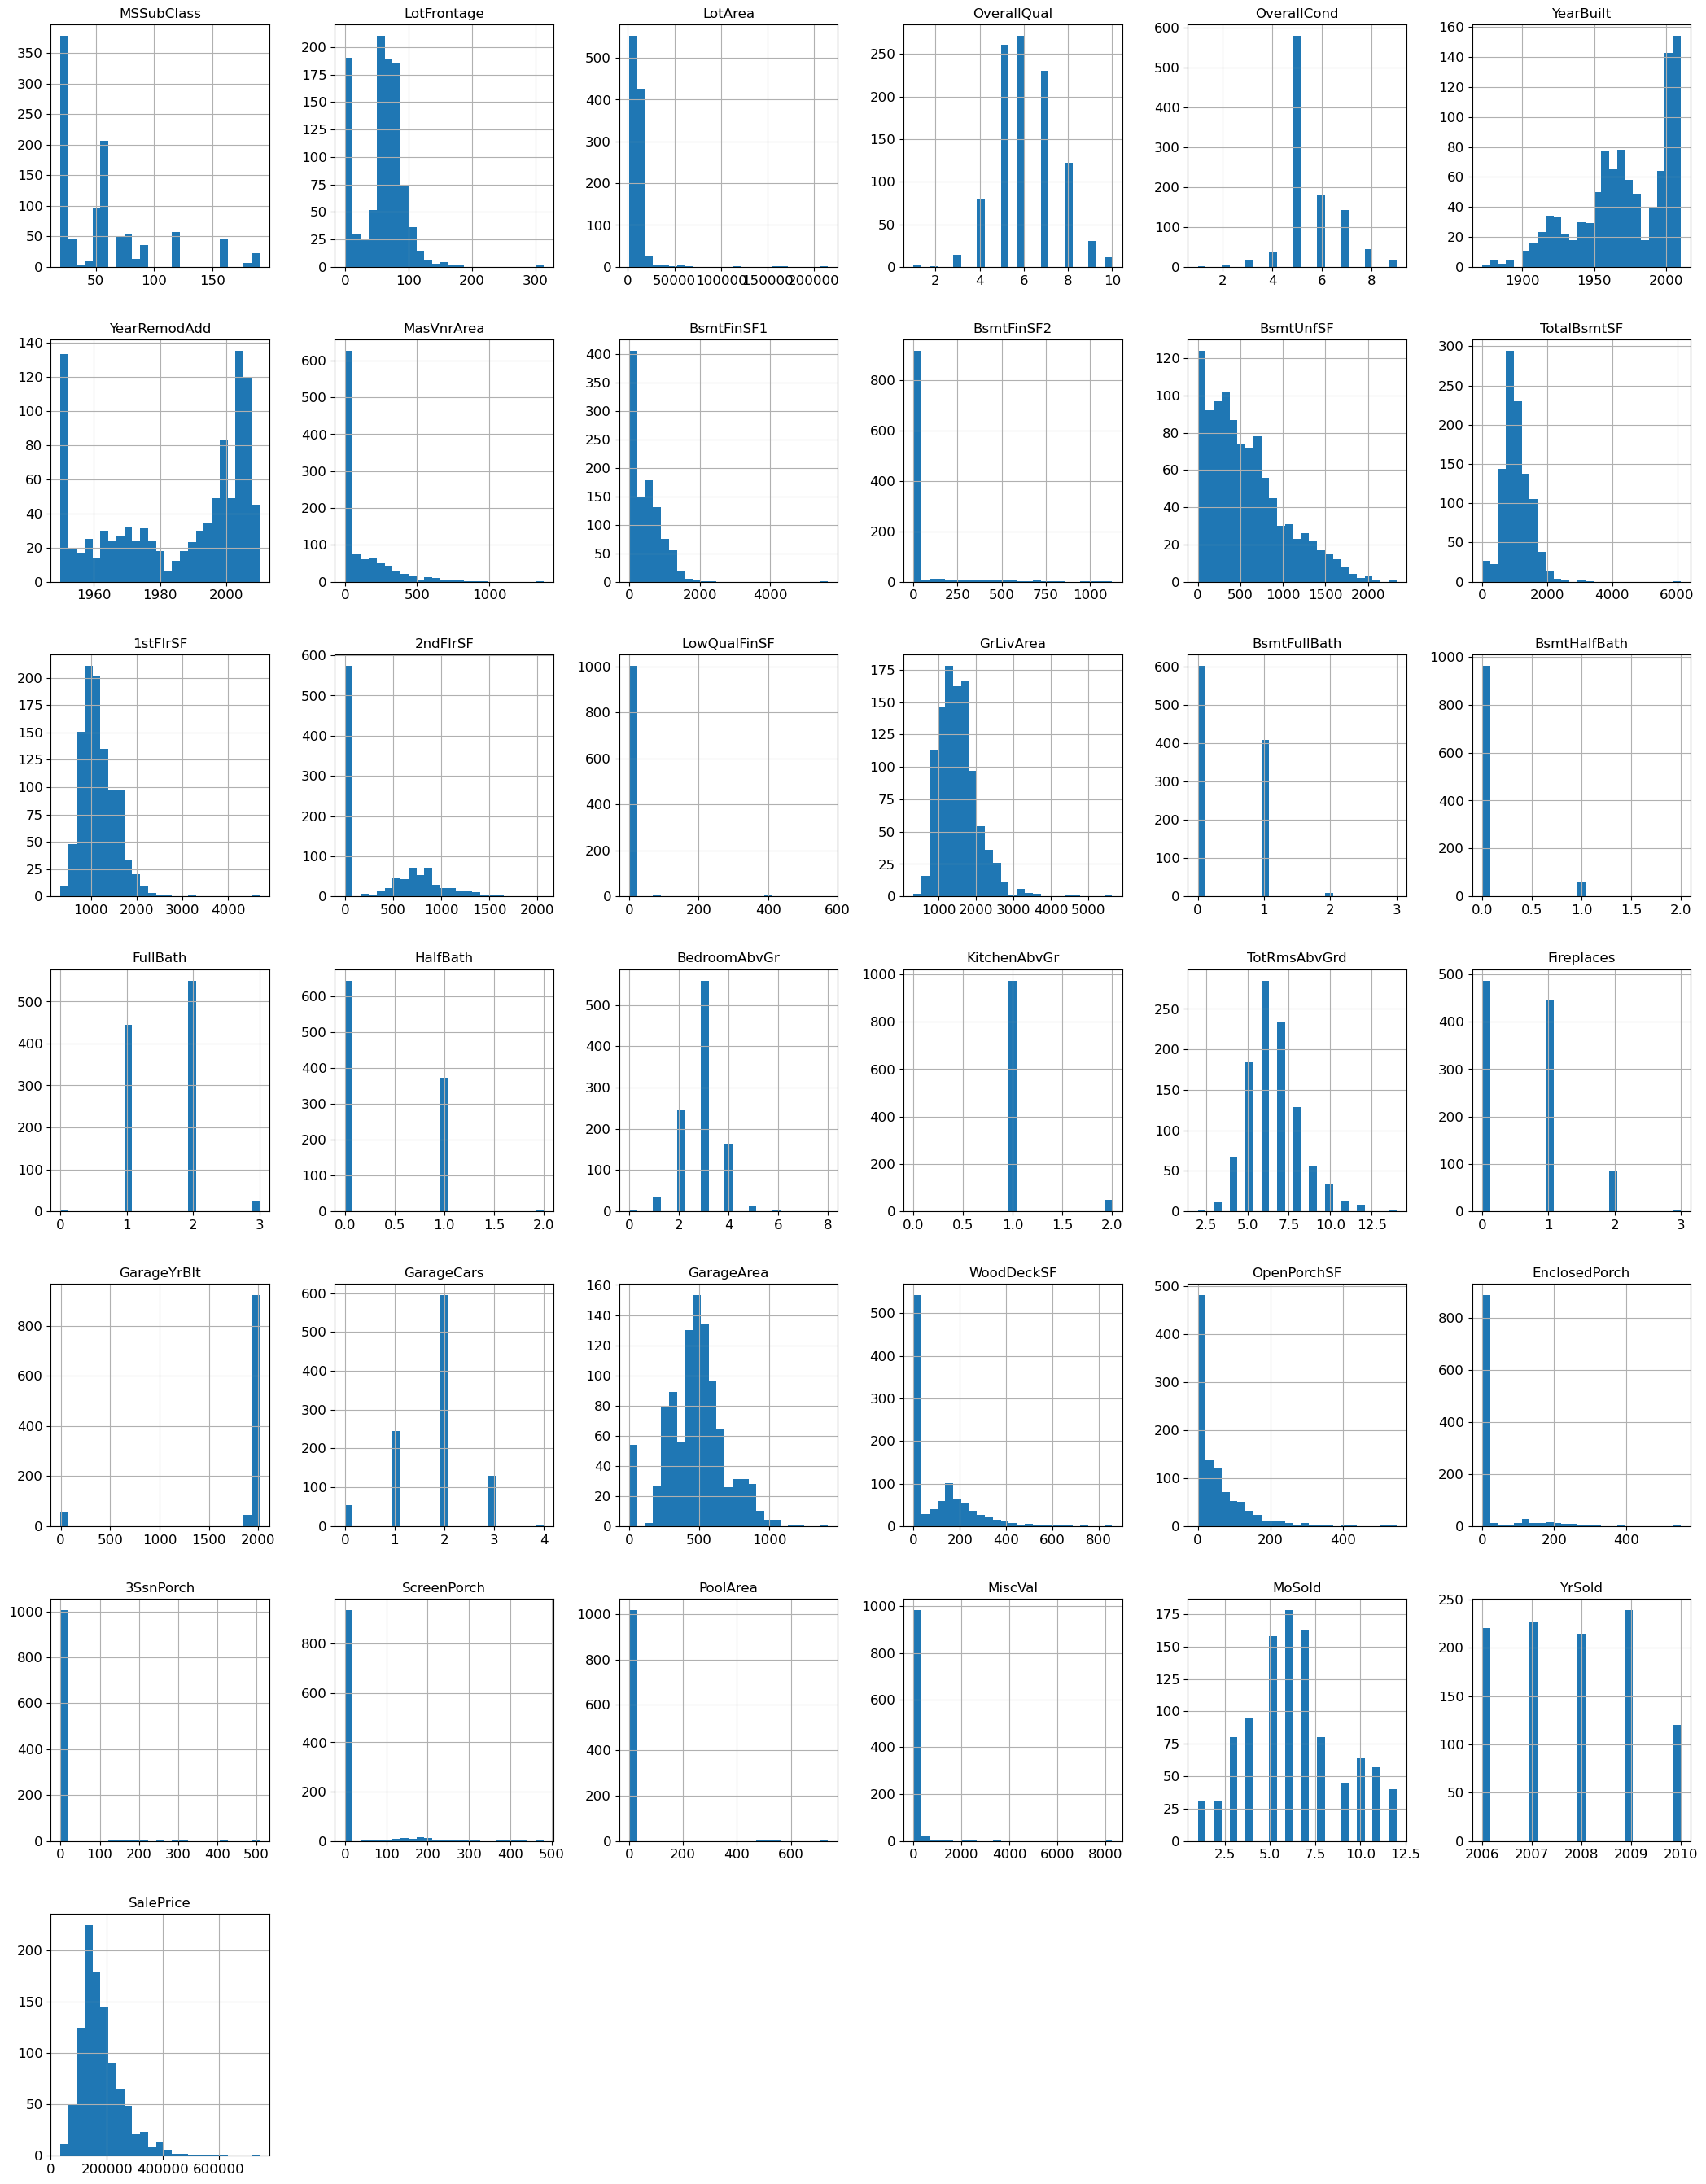

In [13]:
df_num.hist(figsize=(26, 34), bins=25, xlabelsize=12, ylabelsize=12);

C:\Users\nnodu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nnodu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


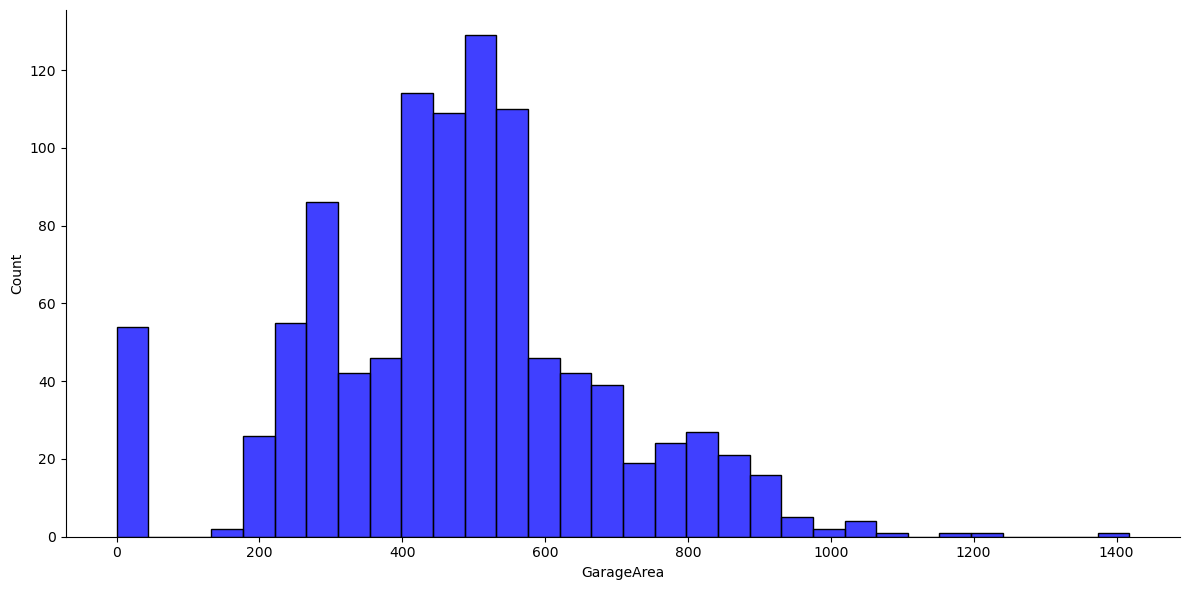

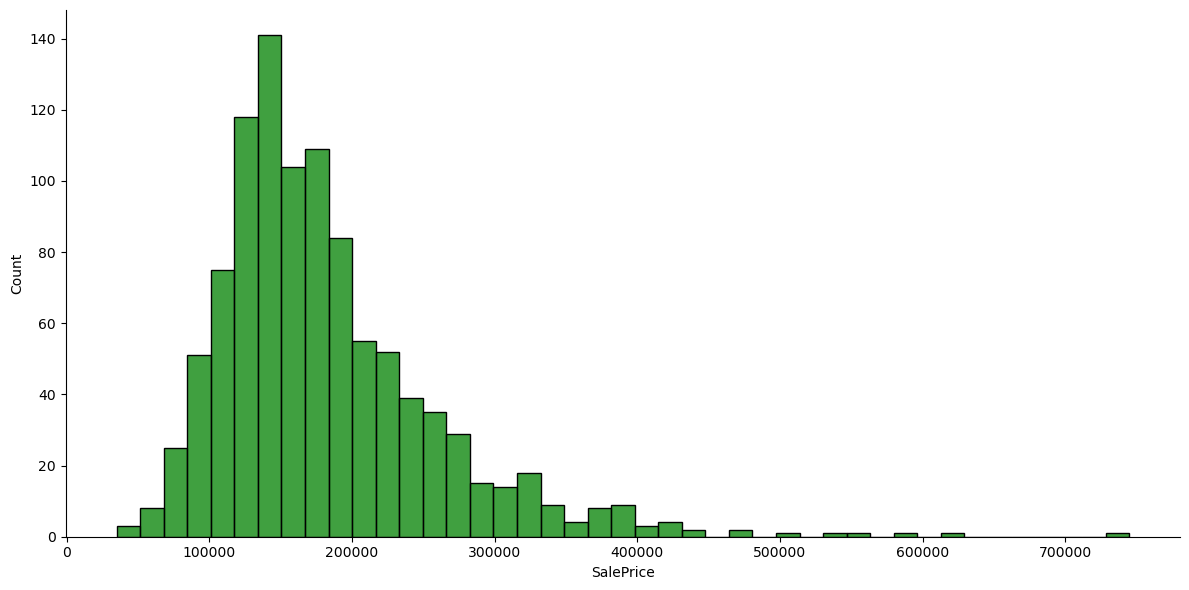

In [14]:
# Assuming df_num is your DataFrame containing 'GarageArea' and 'SalePrice' columns
sns.displot(data=df_num, x='GarageArea', kind='hist', color='blue', aspect=2, height=6)
sns.displot(data=df_num, x='SalePrice', kind='hist', color='green', aspect=2, height=6)

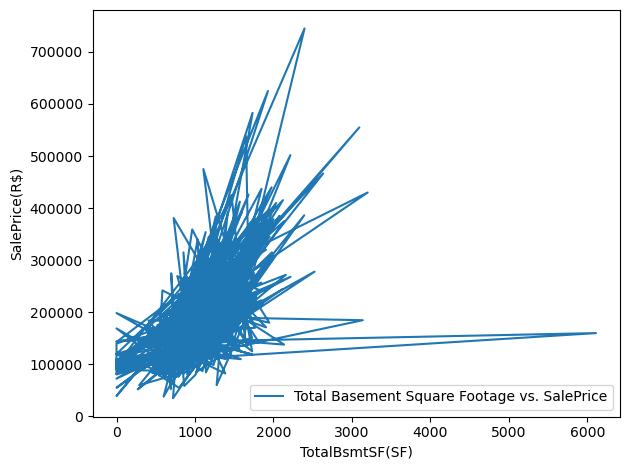

In [15]:
#This code snippet creates a scatter plot of 'TotalBsmtSF' (total basement square footage) against 'SalePrice'
plt.plot(df_num['TotalBsmtSF'],df_num['SalePrice'], label='Total Basement Square Footage vs. SalePrice')
plt.xlabel('TotalBsmtSF(SF)')
plt.ylabel('SalePrice(R$)')
plt.legend()
plt.tight_layout()

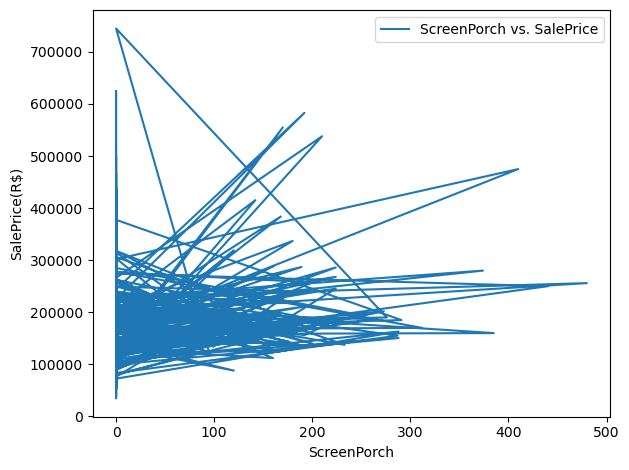

In [27]:
#This code snippet creates a scatter plot of 'TotalBsmtSF' (total basement square footage) against 'SalePrice'
plt.plot(df_num['ScreenPorch'],df_num['SalePrice'], label='ScreenPorch vs. SalePrice')
plt.xlabel('ScreenPorch')
plt.ylabel('SalePrice(R$)')
plt.legend()
plt.tight_layout()

C:\Users\nnodu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


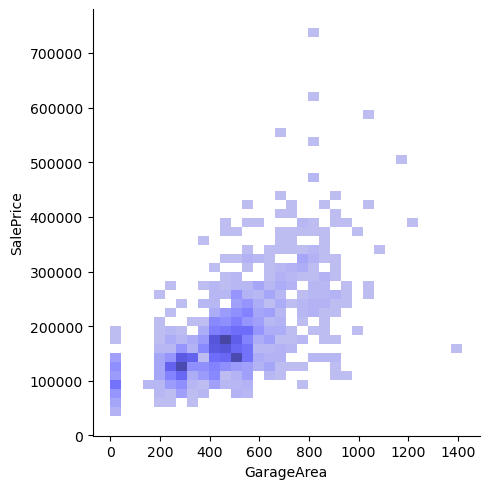

In [16]:
sns.displot(data=df_num, x='GarageArea', y='SalePrice', kind='hist', color='blue', height=5)

In [23]:
#finding the important features
print(df_num.columns)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [24]:
X = df_num[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', ]]  # Features
y = df_num['SalePrice']      # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [25]:
# Get feature importances
feature_importances = model.feature_importances_

# Zip feature names and importances
features = X_train.columns
feature_importance_pairs = zip(features, feature_importances)

# Sort feature importance pairs by importance
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print or visualize feature importance
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance}")

OverallQual: 0.6057272941672438
GrLivArea: 0.09660280541505206
2ndFlrSF: 0.07332058633401319
TotalBsmtSF: 0.033583039756356015
YearBuilt: 0.03212059832559717
WoodDeckSF: 0.021478104447275662
BsmtFinSF1: 0.02073573235391247
GarageArea: 0.02023991550875259
LotArea: 0.01702692640147122
BedroomAbvGr: 0.008324965321740251
1stFlrSF: 0.0075722869202234245
LotFrontage: 0.006971147342047026
GarageYrBlt: 0.006561647376625233
OverallCond: 0.006384467079938792
BsmtUnfSF: 0.005986936902567653
YearRemodAdd: 0.005885728903640105
MSSubClass: 0.005397182166525942
MasVnrArea: 0.004711159772990293
YrSold: 0.0037799606810465392
MoSold: 0.0029771906914475045
EnclosedPorch: 0.002199403443589902
BsmtFinSF2: 0.0021550245876261827
PoolArea: 0.0021487419423607042
Fireplaces: 0.0021094319618416403
OpenPorchSF: 0.002075340865409812
FullBath: 0.0014575822300341133
BsmtFullBath: 0.0011574163774134315
TotRmsAbvGrd: 0.0008005062799938216
KitchenAbvGr: 0.00012668155694833783
ScreenPorch: 0.00012027833346110869
LowQual

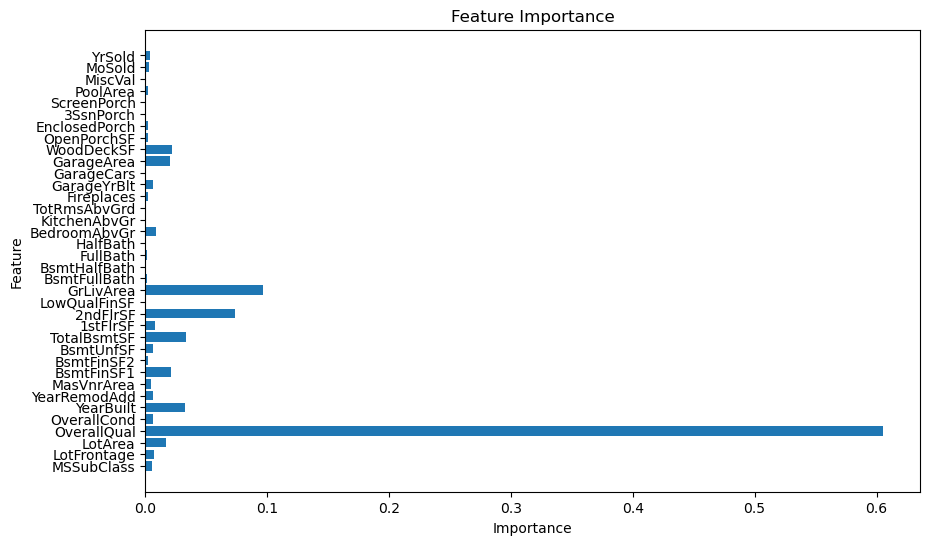

In [26]:
# Optionally, visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


#adding multiple features to the mix
#Define Features (X) and Target Variable (y):
X = df_num[['OverallQual', 'GrLivArea', '2ndFlrSF', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF']]  # Features
y = df_num['SalePrice']      # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

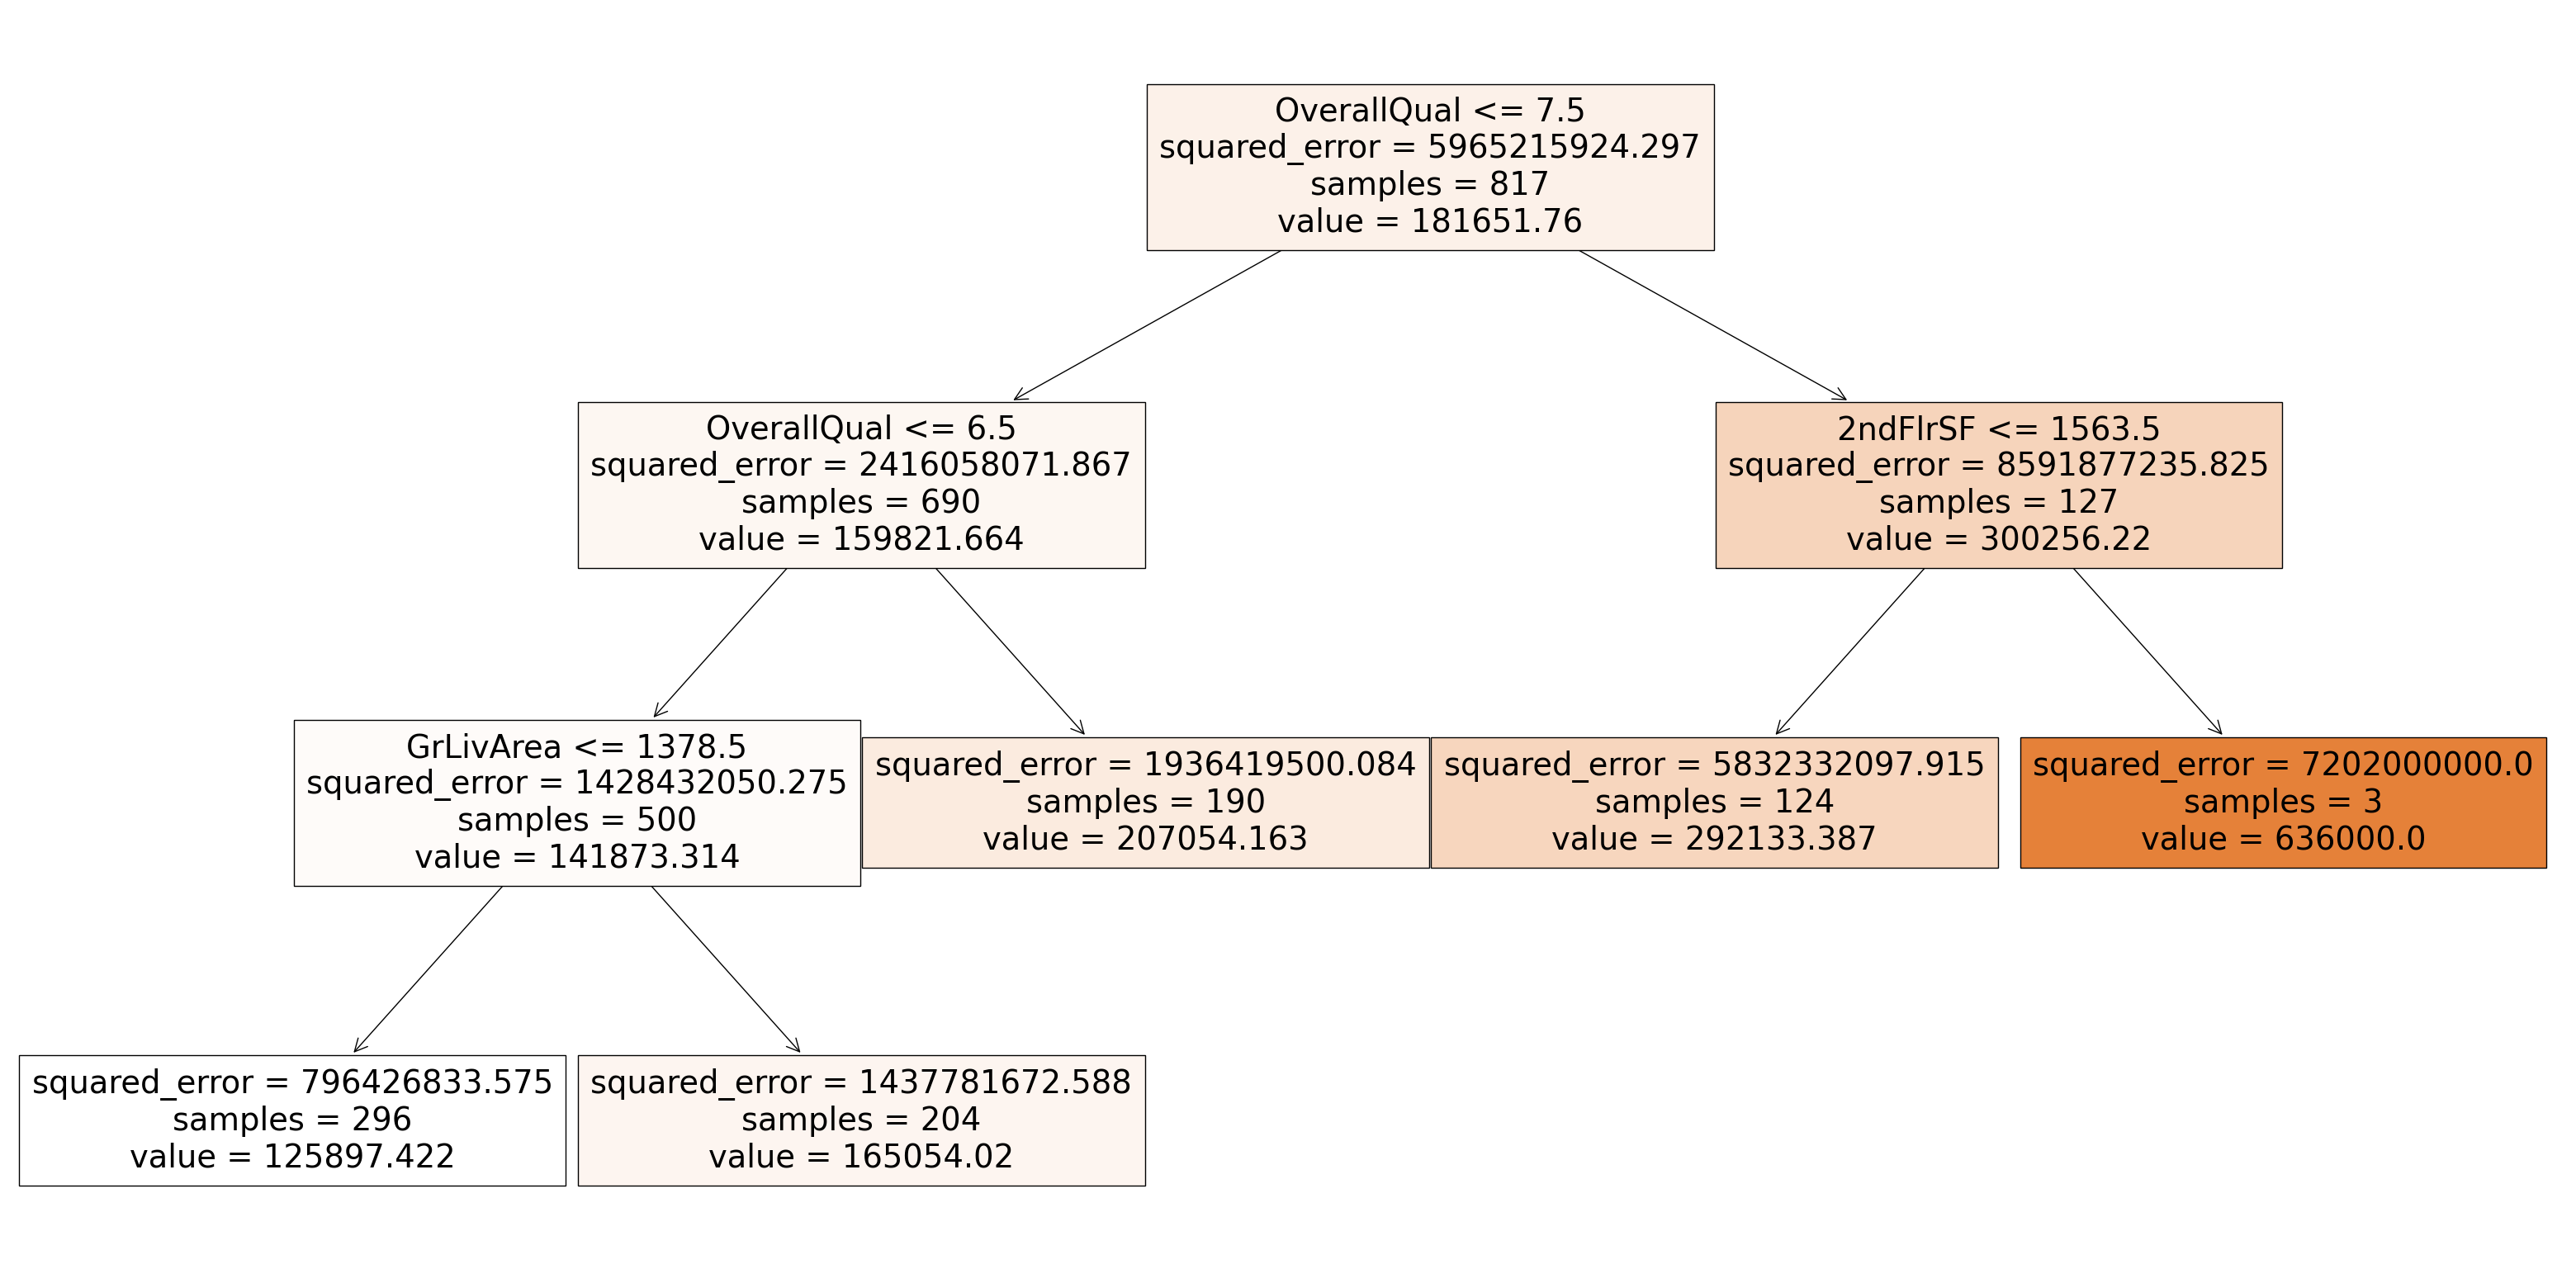

In [18]:
# Train a pruned decision tree regressor
model_pruned = DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42, max_leaf_nodes=5)
model_pruned.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(40,20))
plot_tree(model_pruned, feature_names=X.columns.tolist(), filled=True)
plt.show()

In [19]:
#ACCURACY
from sklearn.metrics import accuracy_score


# Calculate accuracy
model_score = model.score(X_test, y_test)
print(f"Accuracy: {model_score}")

Accuracy: 0.7408947933449082


In [20]:
#predict
model_predict = model.predict(X_test)

In [21]:
# Evaluate the model MSE & MAE
mse = mean_squared_error(y_test, model_predict)
mae = mean_absolute_error(y_test, model_predict)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1613953002.619512
Mean Absolute Error: 27377.39024390244


In [22]:
#Prediction
decision_tree_model_preds = model.predict(df_num[['OverallQual', 'GrLivArea', '2ndFlrSF', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF']])
output = pd.DataFrame({'SalePrice': decision_tree_model_preds.squeeze()})
output.head(10)

,SalePrice
0,174000.0
1,145000.0
2,215200.0
3,475000.0
4,212000.0
5,168500.0
6,189000.0
7,140000.0
8,187500.0
9,254900.0
